<a href="https://colab.research.google.com/github/Shurui-Zhang/Couputer_Vision/blob/main/image_recognition/KNN_by_using_KNeighborsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import transforms 
import matplotlib
import matplotlib.pyplot as plt
import numpy

import operator
import torch
from sklearn.neighbors import KNeighborsClassifier

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_images(path_train, path_test):
  transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.CenterCrop(200),
    transforms.Resize((16, 16)),
    transforms.ToTensor()  # convert to tensor
  ])



  train_dataset = ImageFolder(path_train, transform)
  train_loader = DataLoader(train_dataset, batch_size=1)

  test_dataset = ImageFolder(path_test, transform)
  test_loader = DataLoader(test_dataset, batch_size=1)
  return train_loader, test_loader, train_dataset, test_dataset

In [ ]:
def process_data(train_loader, test_loader):
  matrix_train_image = []
  matrix_train_label = []
  matrix_test_image = []
  matrix_test_label = []
  for train_image, train_label in train_loader:
    train_image = train_image.view(1, 256)
    numpy_train_image = train_image.numpy()
    numpy_train_label = train_label.numpy()
    matrix_train_image.append(numpy_train_image[0])
    matrix_train_label.append(numpy_train_label[0])
    # print(numpy_train_image)
    # print(numpy_train_label[0])
    # break

  for test_image, test_label in test_loader:
    test_image = test_image.view(1, 256)
    numpy_test_image = test_image.numpy()
    numpy_test_label = test_label.numpy()
    matrix_test_image.append(numpy_test_image[0])
    matrix_test_label.append(numpy_test_label[0])

  matrix_train_image = numpy.asarray(matrix_train_image)
  matrix_train_label = numpy.asarray(matrix_train_label)

  matrix_test_image = numpy.asarray(matrix_test_image)
  matrix_test_label = numpy.asarray(matrix_test_label)
  return matrix_train_image, matrix_train_label, matrix_test_image, matrix_test_label

1000
500
k=1:the score is 0.204
k=2:the score is 0.204
k=3:the score is 0.21
k=4:the score is 0.212
k=5:the score is 0.198
k=6:the score is 0.21
k=7:the score is 0.224
k=8:the score is 0.248
k=9:the score is 0.232
k=10:the score is 0.234
k=11:the score is 0.232
k=12:the score is 0.222
k=13:the score is 0.232
k=14:the score is 0.236
k=15:the score is 0.232
k=16:the score is 0.232
k=17:the score is 0.23
k=18:the score is 0.24
k=19:the score is 0.236
k=20:the score is 0.228
k=21:the score is 0.228
k=22:the score is 0.232
k=23:the score is 0.232
k=24:the score is 0.224
k=25:the score is 0.224
k=26:the score is 0.224
k=27:the score is 0.224
k=28:the score is 0.216
k=29:the score is 0.22
k=30:the score is 0.222


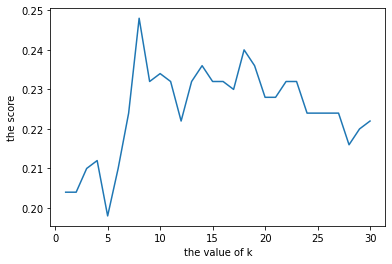

In [ ]:
# path_train = "drive/MyDrive/Colab Notebooks/cv/images/train_test/training"
# path_test = "drive/MyDrive/Colab Notebooks/cv/images/test_test"

# train_loader, test_loader, train_dataset, test_dataset = load_images(path_train, path_test)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.CenterCrop(200),
    transforms.Resize((16, 16)),
    transforms.ToTensor()  # convert to tensor
])
train_dataset = ImageFolder("drive/MyDrive/Colab Notebooks/cv/images/training/training", transform)
tr, va = random_split(train_dataset, [len(train_dataset) - len(train_dataset)//3, len(train_dataset)//3])
trainloader = DataLoader(tr, batch_size=1)
valloader = DataLoader(va, batch_size=1)
print(len(tr))
print(len(va))

matrix_train_image, matrix_train_label, matrix_test_image, matrix_test_label = process_data(trainloader, valloader)

k_list = []
score_list= []
for k in range(1,31):
  neigh = KNeighborsClassifier(k,weights='distance')
  neigh.fit(matrix_train_image, matrix_train_label)
  #predict = neigh.predict(matrix_test_image)
  score = neigh.score(matrix_test_image, matrix_test_label)
  print("k=" + str(k) +":"+ "the score is "+ str(score))
  k_list.append(k)
  score_list.append(score)

# 绘制数据
plt.plot(k_list, score_list)
# 标记
plt.xlabel("the value of k")
plt.ylabel("the score")

#plt.legend(loc="upper left")


plt.show()

In [ ]:
def knn(k, matrix_train_image, matrix_train_label, matrix_test_image, test_images, classes):
  neigh = KNeighborsClassifier(k, weights='distance')
  neigh.fit(matrix_train_image, matrix_train_label)
  predictions = neigh.predict(matrix_test_image)
  
  results = []
  for i in range(len(test_images)):
    image_name = test_images[i][0]
    class_name = classes[predictions[i]]
    results.append((image_name, class_name))
  return results
    

In [ ]:
path_train = "drive/MyDrive/Colab Notebooks/cv/images/training/training"
path_test = "drive/MyDrive/Colab Notebooks/cv/images/testing"

# path_train = "drive/MyDrive/Colab Notebooks/cv/images/train_test/training"
# path_test = "drive/MyDrive/Colab Notebooks/cv/images/test_test"

train_loader, test_loader, train_dataset, test_dataset = load_images(path_train, path_test)
matrix_train_image, matrix_train_label, matrix_test_image, matrix_test_label = process_data(train_loader, test_loader)

test_images = test_dataset.imgs
classes = ['coast', 'forest', 'highway', 'insidecity', 'mountain', 'office', 'openCountry', 'street', 'suburb', 'tallBuilding', 'bedroom', 'industrial', 'kitchen', 'livingroom', 'store']

predictions = knn(14, matrix_train_image, matrix_train_label, matrix_test_image, test_images, classes)
print(predictions)

[('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/0.jpg', 'highway'), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1.jpg', 'forest'), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/10.jpg', 'openCountry'), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/100.jpg', 'mountain'), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1000.jpg', 'openCountry'), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1001.jpg', 'highway'), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1002.jpg', 'forest'), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1003.jpg', 'forest'), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1004.jpg', 'industrial'), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1005.jpg', 'highway'), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1006.jpg', 'office'), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1007.jpg', 'forest'), ('drive/MyDrive/Colab Noteboo

In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.CenterCrop(200),
    transforms.Resize((16, 16)),
    transforms.ToTensor()  # convert to tensor
])


#"drive/MyDrive/Colab Notebooks/cv/images/training/training"
test_dataset = ImageFolder("drive/MyDrive/Colab Notebooks/cv/images/testing", transform)
test_loader = DataLoader(train_dataset, batch_size=1)
train_dataset = ImageFolder("drive/MyDrive/Colab Notebooks/cv/images/training/training", transform)
train_loader = DataLoader(train_dataset, batch_size=1)
for i in test_dataset.imgs:
  print(i)
print(len(test_dataset.imgs))#图片喂入的顺序是按字符串大小顺序排列的。11.jpg>2.jpg classes的排列也是按字符大小排列的

('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/0.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/10.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/100.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1000.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1001.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1002.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1003.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1004.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1005.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1006.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1007.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1008.jpg', 0)
('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1009.jpg', 0)
(

In [ ]:
print(train_dataset.classes)

['Coast', 'Forest', 'Highway', 'Insidecity', 'Mountain', 'Office', 'OpenCountry', 'Street', 'Suburb', 'TallBuilding', 'bedroom', 'industrial', 'kitchen', 'livingroom', 'store']


In [ ]:
def text_save(filename, data):#filename为写入CSV文件的路径，data为要写入数据列表.
    file = open(filename,'a')
    for i in range(len(data)):
        #s1 = data[i][0].replace("'",'')
        s1 = data[i][0][data[i][0].rfind('/')+1:]
        s2 = data[i][1].replace("'",'')+'\n'

        file.write(s1.ljust(20))
        file.write(s2)
    file.close()
    print("保存文件成功") 

In [ ]:
print(test_dataset.imgs)

[('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/0.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/10.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/100.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1000.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1001.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1002.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1003.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1004.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1005.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1006.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1007.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1008.jpg', 0), ('drive/MyDrive/Colab Notebooks/cv/images/testing/testing/1

In [ ]:
text_save("drive/MyDrive/Colab Notebooks/cv/aa.txt", predictions)

保存文件成功


In [ ]:
def text_save2(filename, data):#filename为写入CSV文件的路径，data为要写入数据列表.
    file = open(filename,'a')
    for i in range(len(data)):
        #s1 = data[i][0].replace("'",'')
        s1 = data[i][0][data[i][0].rfind('/')+1:]
        s2 = data[i][1].replace("'",'')+'\n'

        s3 = s1[:s1.rfind('.')]

        print(s1)

        file.write(s1.ljust(20))
        file.write(s2)
    file.close()
    print("保存文件成功") 

In [ ]:
text_save2("drive/MyDrive/Colab Notebooks/cv/bb.txt", predictions)

流式输出内容被截断，只能显示最后 5000 行内容。
1435.jpg
1436
1436.jpg
1437
1437.jpg
1438
1438.jpg
1439
1439.jpg
144
144.jpg
1440
1440.jpg
1441
1441.jpg
1442
1442.jpg
1443
1443.jpg
1444
1444.jpg
1445
1445.jpg
1446
1446.jpg
1447
1447.jpg
1448
1448.jpg
1449
1449.jpg
145
145.jpg
1450
1450.jpg
1451
1451.jpg
1452
1452.jpg
1453
1453.jpg
1454
1454.jpg
1455
1455.jpg
1456
1456.jpg
1457
1457.jpg
1458
1458.jpg
1459
1459.jpg
146
146.jpg
1460
1460.jpg
1461
1461.jpg
1462
1462.jpg
1463
1463.jpg
1464
1464.jpg
1465
1465.jpg
1466
1466.jpg
1467
1467.jpg
1468
1468.jpg
1469
1469.jpg
147
147.jpg
1470
1470.jpg
1471
1471.jpg
1472
1472.jpg
1473
1473.jpg
1474
1474.jpg
1475
1475.jpg
1476
1476.jpg
1477
1477.jpg
1478
1478.jpg
1479
1479.jpg
148
148.jpg
1480
1480.jpg
1481
1481.jpg
1482
1482.jpg
1483
1483.jpg
1484
1484.jpg
1485
1485.jpg
1486
1486.jpg
1487
1487.jpg
1488
1488.jpg
1489
1489.jpg
149
149.jpg
1490
1490.jpg
1491
1491.jpg
1492
1492.jpg
1493
1493.jpg
1494
1494.jpg
1495
1495.jpg
1496
1496.jpg
1497
1497.jpg
1498
1498.jpg
1499
1499.

In [ ]:
results = []

for i in range(len(predictions)):
  s1 = predictions[i][0][predictions[i][0].rfind('/')+1:]
  s2 = predictions[i][1]
  s3 = s1[:s1.rfind('.')]
  results.append((int(s3), s1, s2))

print(results)
final_results = sorted(results, key=lambda x: x[0])
print(final_results)

[(0, '0.jpg', 'highway'), (1, '1.jpg', 'forest'), (10, '10.jpg', 'openCountry'), (100, '100.jpg', 'mountain'), (1000, '1000.jpg', 'openCountry'), (1001, '1001.jpg', 'highway'), (1002, '1002.jpg', 'forest'), (1003, '1003.jpg', 'forest'), (1004, '1004.jpg', 'industrial'), (1005, '1005.jpg', 'highway'), (1006, '1006.jpg', 'office'), (1007, '1007.jpg', 'forest'), (1008, '1008.jpg', 'highway'), (1009, '1009.jpg', 'forest'), (101, '101.jpg', 'insidecity'), (1010, '1010.jpg', 'forest'), (1011, '1011.jpg', 'forest'), (1012, '1012.jpg', 'mountain'), (1013, '1013.jpg', 'highway'), (1014, '1014.jpg', 'coast'), (1015, '1015.jpg', 'highway'), (1016, '1016.jpg', 'openCountry'), (1017, '1017.jpg', 'highway'), (1018, '1018.jpg', 'openCountry'), (1019, '1019.jpg', 'highway'), (102, '102.jpg', 'coast'), (1020, '1020.jpg', 'highway'), (1021, '1021.jpg', 'openCountry'), (1022, '1022.jpg', 'forest'), (1023, '1023.jpg', 'highway'), (1024, '1024.jpg', 'highway'), (1025, '1025.jpg', 'office'), (1026, '1026.jp

In [ ]:
def text_save3(filename, data):#filename为写入CSV文件的路径，data为要写入数据列表.
    file = open(filename,'a')
    for i in range(len(data)):
        s1 = data[i][1]
        s2 = data[i][2]
        s = s1 + " " + s2 + '\n'

        file.write(s)
    file.close()
    print("保存文件成功") 

In [ ]:
text_save3("drive/MyDrive/Colab Notebooks/cv/run1.txt", final_results)

保存文件成功
